In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['Fish.csv']


## in this dataset i have tried to predict weight of fish using length as input

In [2]:
df=pd.read_csv('../input/Fish.csv')

In [3]:
df.columns

Index(['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height',
       'Width'],
      dtype='object')

In [4]:
#df.columns = ['cement', 'slag', 'ash', 'water', 'splast', 'coarse', 'fine', 'age', 'strength']


In [5]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [6]:
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

## pairplots and correlation between various variables

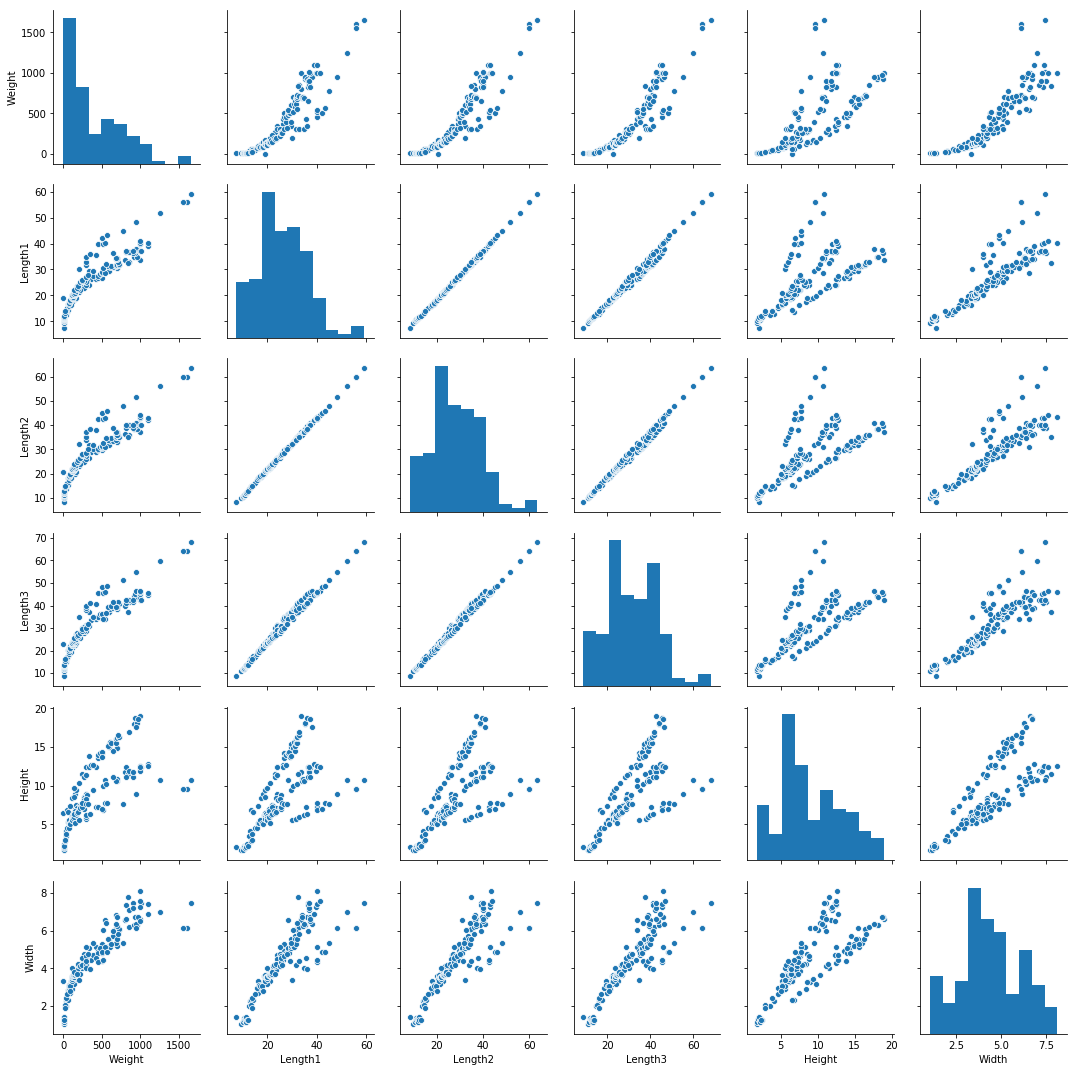

In [8]:
sns.pairplot(df)

In [9]:
df[['Length1','Length2','Length3','Height','Width']].head()

,Length1,Length2,Length3,Height,Width
0,23.2,25.4,30.0,11.5200,4.0200
1,24.0,26.3,31.2,12.4800,4.3056
2,23.9,26.5,31.1,12.3778,4.6961
3,26.3,29.0,33.5,12.7300,4.4555
4,26.5,29.0,34.0,12.4440,5.1340


In [10]:
df.corr()

,Weight,Length1,Length2,Length3,Height,Width
Weight,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507
Length1,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050
Length2,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547
Length3,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520
Height,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881
Width,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000


In [11]:
x=df[['Length3']]

y=df['Weight']

## splitting the dataset 

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=45)


In [13]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
import math
import matplotlib.pyplot as plt


## calculating rse root mean square error of test and trainig data to see forr best possible k value by taking into consideration k values from 0 to 50

In [14]:
rtestse_values = []
rtrainse_values = []

for k in range(50):
    k = k+1
    k_nr = neighbors.KNeighborsRegressor(n_neighbors = k)

    k_nr.fit(x_train, y_train) 
    pr=k_nr.predict(x_test)
    pr1=k_nr.predict(x_train)
    rtest_err =math.sqrt(mean_squared_error(y_test,pr)) 
    rtrain_err =math.sqrt(mean_squared_error(y_train,pr1)) 
    rtestse_values.append(rtest_err )
    rtrainse_values.append(rtrain_err)
    print('RSE test=' , k , 'is:',rtest_err)
    print('RSE train=' , k , 'is:',rtrain_err)
    

RSE test= 1 is: 211.1908272155777
RSE train= 1 is: 12.15274288643784
RSE test= 2 is: 187.1659781450678
RSE train= 2 is: 58.03410725635415
RSE test= 3 is: 169.68193472559835
RSE train= 3 is: 79.29153849285534
RSE test= 4 is: 160.4176781191057
RSE train= 4 is: 94.26659785198699
RSE test= 5 is: 158.80082739079162
RSE train= 5 is: 94.95562006280937
RSE test= 6 is: 165.1794143247477
RSE train= 6 is: 99.1705058456993
RSE test= 7 is: 173.71159997042716
RSE train= 7 is: 105.7972319702844
RSE test= 8 is: 180.8070507842027
RSE train= 8 is: 113.18921467758194
RSE test= 9 is: 180.10552617463455
RSE train= 9 is: 113.93075703736805
RSE test= 10 is: 183.47230234425032
RSE train= 10 is: 113.55271604787241
RSE test= 11 is: 184.1808603807098
RSE train= 11 is: 113.32081993057663
RSE test= 12 is: 183.83385717381546
RSE train= 12 is: 113.91364693632336
RSE test= 13 is: 181.99303089508317
RSE train= 13 is: 116.26023506116162
RSE test= 14 is: 183.2419539537153
RSE train= 14 is: 117.54111410287327
RSE test= 1

## chcking min rse values for training and testing data and deducing out that that test data has min rse for k=5

In [15]:
print(min(rtestse_values))
print(min(rtrainse_values))


158.80082739079162
12.15274288643784


## lineplot of training and testing error against k value

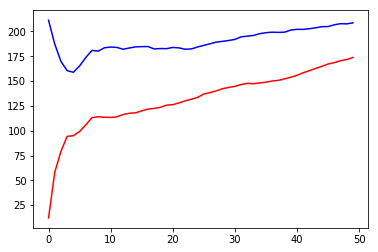

In [16]:
sns.lineplot(x=range(50),y=rtestse_values,color='blue')
sns.lineplot(x=range(50),y=rtrainse_values,color='red')

In [131]:
len(pr)

40

In [132]:
len(rtestse_values)

50

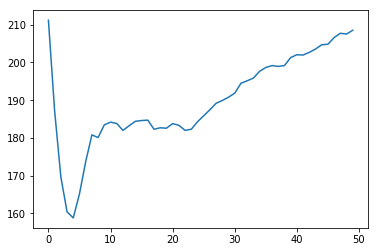

In [17]:
sns.lineplot(x=range(50),y=rtestse_values)

## converting dataframes to numpy

In [20]:
x_trainnp=x_train.values
x_testnp=x_test.values


In [21]:
type(x_trainnp)

numpy.ndarray

In [22]:
len(x_train)


119

## calculating corresponding target values for k value by min eucleidien distance and taking average of all the target variables i.e 5 values in this case since we take k=5

In [63]:
def targ_mean(y,k):
    distances=[]
    for i in range(len(x_train)):
        dist=(math.sqrt(((y)-(x_trainnp[i][0]))**2))
        distances.append([dist,i])
    distances=sorted(distances)

    target_mean=0
    for i in range(k):
        for j in range(len(x_test)):
            if (distances[i][0] == (math.sqrt(((y)-(x_trainnp[j][0]))**2))) :
                target_mean=target_mean+x_trainnp[j][0]
    return (target_mean/k)
        
    
    

In [134]:
#p=targ_mean(,2)
#print(p)

In [127]:
#x_testnp

In [129]:
#x_testnp[1][0]

## converting ytest and ytraining to numpy and y train to list for easy handling

In [27]:
y_trainnp=y_train.values
y_testnp=y_test.values
y_trainnp.tolist()

[720.0,
 130.0,
 920.0,
 975.0,
 140.0,
 150.0,
 290.0,
 197.0,
 1250.0,
 685.0,
 60.0,
 1100.0,
 10.0,
 78.0,
 160.0,
 180.0,
 200.0,
 290.0,
 130.0,
 456.0,
 169.0,
 300.0,
 650.0,
 1000.0,
 218.0,
 160.0,
 70.0,
 340.0,
 120.0,
 110.0,
 680.0,
 9.8,
 540.0,
 390.0,
 200.0,
 19.7,
 125.0,
 32.0,
 110.0,
 500.0,
 575.0,
 145.0,
 610.0,
 78.0,
 300.0,
 115.0,
 7.5,
 300.0,
 150.0,
 170.0,
 80.0,
 85.0,
 450.0,
 130.0,
 270.0,
 150.0,
 800.0,
 700.0,
 250.0,
 273.0,
 225.0,
 850.0,
 1000.0,
 540.0,
 820.0,
 6.7,
 13.4,
 714.0,
 260.0,
 620.0,
 188.0,
 9.9,
 12.2,
 250.0,
 685.0,
 840.0,
 9.7,
 900.0,
 700.0,
 390.0,
 200.0,
 90.0,
 51.5,
 100.0,
 161.0,
 1550.0,
 265.0,
 500.0,
 120.0,
 320.0,
 500.0,
 120.0,
 955.0,
 69.0,
 600.0,
 270.0,
 1000.0,
 556.0,
 700.0,
 500.0,
 700.0,
 12.2,
 950.0,
 450.0,
 140.0,
 820.0,
 306.0,
 272.0,
 1600.0,
 150.0,
 600.0,
 900.0,
 1015.0,
 145.0,
 170.0,
 925.0,
 1000.0,
 300.0,
 19.9]

In [113]:
len(x_test)
k=0

## predicting values for ytest using x test and KNN function derived..

In [147]:
predicate=[]
def predic():
    for i in range(len(x_test)):
        testor=x_testnp[i][0]
        target=targ_mean(testor,5)
        
        #print(target) 
        for j in range(len(x_testnp)):
            if target in x_trainnp:
                print(y_trainnp[j],j)
                predicate.append(y_trainnp[j])
                
            
        

In [148]:
predic()

720.0 0
130.0 1
920.0 2
975.0 3
140.0 4
150.0 5
290.0 6
197.0 7
1250.0 8
685.0 9
60.0 10
1100.0 11
10.0 12
78.0 13
160.0 14
180.0 15
200.0 16
290.0 17
130.0 18
456.0 19
169.0 20
300.0 21
650.0 22
1000.0 23
218.0 24
160.0 25
70.0 26
340.0 27
120.0 28
110.0 29
680.0 30
9.8 31
540.0 32
390.0 33
200.0 34
19.7 35
125.0 36
32.0 37
110.0 38
500.0 39


In [84]:
#y_trainnp

In [146]:
predicate[:40]

[720.0,
 130.0,
 920.0,
 975.0,
 140.0,
 150.0,
 290.0,
 197.0,
 1250.0,
 685.0,
 60.0,
 1100.0,
 10.0,
 78.0,
 160.0,
 180.0,
 200.0,
 290.0,
 130.0,
 456.0,
 169.0,
 300.0,
 650.0,
 1000.0,
 218.0,
 160.0,
 70.0,
 340.0,
 120.0,
 110.0,
 680.0,
 9.8,
 540.0,
 390.0,
 200.0,
 19.7,
 125.0,
 32.0,
 110.0,
 500.0]

In [92]:
len(y_testnp)

40

In [150]:
#len(predicate)

## taking out root mean square error for predicted value

In [151]:
rpred_err =math.sqrt(mean_squared_error(y_test,predicate[:40])) 
print(rpred_err)

487.45423554422007


In [143]:
#predicate

In [142]:
#x_trainnp[34][0]